## <b>Multivariate Outlier Detection</b>

This notebook shows three methods on multivariate outlier detection.

<i>Method 1</i>: Z-score Analysis

<i>Method 2</i>: Isolation Forest

<i>Method 3</i>: Principal Component Analysis

## Import the Libraries

In [3]:
#for numerical analysis
import numpy as np

#for data preprocessing
import pandas as pd

#for visualization
import seaborn as sns
import matplotlib.pyplot as plt

## Load the Dataset

In [9]:
#we could use pandas' read csv feature to load our dataset
dataset = pd.read_csv('assignment.csv')

## Exploratory Data Analysis

In [6]:
print(dataset.head(5))
print(dataset.tail(5))

          x         y         z
0 -0.341205 -0.329153 -0.115530
1 -0.629867 -0.481546  0.016993
2 -0.841906 -0.979988 -0.191260
3  0.298766  0.214716 -1.130165
4 -0.761079 -1.195055 -1.083350
            x         y         z
995  1.526695  0.963282  0.929112
996  0.430274  0.445060  0.945212
997  0.190370  0.366364  0.548202
998 -0.448977 -0.400381 -0.661205
999 -1.962987 -1.763825 -1.654921


<b>View basic information about the dataset</b>

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
x    1000 non-null float64
y    1000 non-null float64
z    1000 non-null float64
dtypes: float64(3)
memory usage: 23.5 KB


The dataset contains 3 columns (x,y,z) where each column has 1000 entries and no missing values. Great!

<b>Dataset statistics</b>

In [8]:
dataset.describe()

,x,y,z
count,1000.000000,1000.000000,1000.000000
mean,-0.005196,-0.014451,-0.031426
std,1.036113,1.052409,1.052807
min,-5.655540,-5.870240,-5.655540
25%,-0.702440,-0.675936,-0.723400
50%,0.013861,-0.034048,-0.038032
75%,0.662793,0.725451,0.684250
max,3.449685,3.109915,2.954353


The table above shows that the mean and standard deviation of every column is very close to 0 and 1 respectively. Hence, we could assume that the dataset is normally distributed

<b>Method 1: Z-score Analysis</b>

The Z-score tells us how many standard deviations above or below the mean a particular data point or observation.

NOTE: In a normally distributed data, 68% falls within 1 standard deviation from the mean, 95% falls within 2 standard deviations from the mean, and 99.7% falls within 3 standard deviations from the mean. In addition, any data point outside 3 standard deviations can be considered an outlier (i.e. Z-score > 3 or Z-score < -3).

With this idea, we can then compute the Z-scores of every column in our dataset using the Scipy library.

In [11]:
from scipy import stats

In [13]:
#compute for the Z-scores
Z = np.abs(stats.zscore(dataset))
print(Z)

[[0.32445894 0.29917961 0.07992614]
 [0.60319986 0.4440557  0.046013  ]
 [0.80795034 0.91791246 0.15189366]
 ...
 [0.18884415 0.36203141 0.5508298 ]
 [0.42852728 0.36689392 0.59849034]
 [1.89049862 1.66308734 1.54283454]]


We will define a threshold to filter which observations have an absolute Z-score greater than 3.

In [15]:
#set threshold
threshold = 3

#returns an array which corresponds to the row and column index of an outlier
row, column = np.where(Z>threshold)

print(row)
print(' ')
print(column)

[104 104 104 180 180 321 360]
 
[0 1 2 1 2 0 0]


We can combine these arrays to form an ordered pair which points us to the outliers in our dataset.

In [17]:
#combine row and column arrays using zip function
outlier_coordinates = [(x,y) for x,y in zip(row,column)]
outlier_coordinates

[(104, 0), (104, 1), (104, 2), (180, 1), (180, 2), (321, 0), (360, 0)]

Interpretation: Let's take a look at the first 3 entries in the list (104,0),(104,1),(104,2). This means that the data point on the 104th row index is an outlier in the perpective of columns 0,1, and 2.

In [29]:
print("Z-score of 104th row index with respect to X column is: {}".format(Z[104][0]))
print("Z-score of 104th row index with respect to Y column is: {}".format(Z[104][1]))
print("Z-score of 104th row index with respect to X column is: {}".format(Z[104][2]))

Z-score of 104th row index with respect to X column is: 5.456132627729134
Z-score of 104th row index with respect to Y column is: 5.566957376046525
Z-score of 104th row index with respect to X column is: 5.344690726434698


In [34]:
dataset.iloc[104]

x   -5.65554
y   -5.87024
z   -5.65554
Name: 104, dtype: float64

In [35]:
dataset.iloc[180]

x   -2.972287
y   -3.648337
z   -3.393292
Name: 180, dtype: float64

In [36]:
dataset.iloc[321]

x    3.395739
y    3.109915
z    1.955172
Name: 321, dtype: float64

In [37]:
dataset.iloc[360]

x    3.449685
y    2.990145
z    2.575557
Name: 360, dtype: float64

In [41]:
# To Import the Class of PCA
from sklearn.decomposition import PCA

# For the List of Features
features = ['x','y','z']
print('List of Features:')
print(features)
print('')

# To Perform Feature Selection with PCA
selection_method_pca = PCA(n_components=2)
selection_fit_pca = selection_method_pca.fit(dataset)

# To Summarize the Principal Components
explained_variance = selection_fit_pca.explained_variance_ratio_
print("Explained Variance: %s" % explained_variance)
print('')

print("For the Transformed Component:")
components = selection_fit_pca.components_
print(components)

List of Features:
['x', 'y', 'z']

Explained Variance: [0.91386244 0.06543133]

For the Transformed Component:
[[-0.56341364 -0.59478892 -0.57340319]
 [-0.70334995 -0.01879756  0.71059517]]


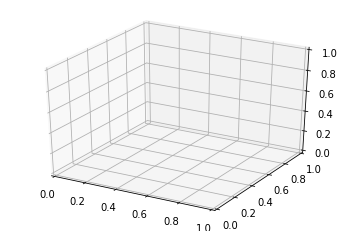

In [45]:
from mpl_toolkits import mplot3d

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection="3d")

plt.show()

In [50]:
x_axis = dataset.iloc[:, 0]

In [51]:
y_axis = dataset.iloc[:, 1]

In [52]:
z_axis = dataset.iloc[:, 2]

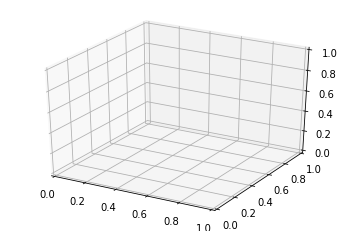

In [59]:
from mpl_toolkits import mplot3d

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection="3d")

plt.show()

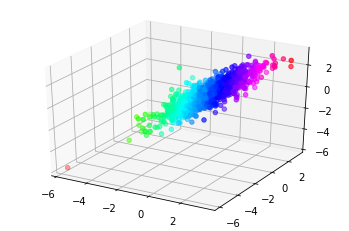

In [65]:
%matplotlib inline

fig = plt.figure()
ax = plt.axes(projection="3d")

#ax.plot3D(x_axis, y_axis, z_axis, 'gray')

ax.scatter3D(x_axis, y_axis, z_axis, c=x_axis, cmap='hsv');

plt.show()